In [6]:
import folium
import networkx as nx

In [4]:
m = folium.Map(location=[-19.912998,-43.940933])
m

In [121]:
G_BH = nx.read_gexf('../graph.gexf')
# G = nx.MultiDiGraph(G,attr={'crs':'epsg:4326', 'simplified':True})
# Remove zero degree nodes
zero_degree_nodes = [n for n, d in G_BH.degree if d == 0]
G_BH.remove_nodes_from(zero_degree_nodes)
def plot(graph):
    plt.figure(figsize=(14, 10), dpi=300)

    pos = {n[0]: (n[1]['x'], n[1]['y']) for n in graph.nodes(data=True)}

    nx.draw(graph, pos, node_size=3, node_color="b", arrowsize=3, edge_color='#ccc')
    # plt.gca().invert_yaxis()
    # plt.gca().invert_xaxis()
    # plt.tight_layout()
    plt.axis("off")
    plt.show()
# plot(G)

In [122]:
import osmnx as ox
import matplotlib.pyplot as plt
G_BH.graph['crs']='epsg:4326'
# G['crs']= 'epsg:4326'
# G['simplified'] = True
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G_BH)


In [123]:
gdf_nodes.geometry

osmid
EMILIO PINHEIRO DE BARROS, RUA, 342    POINT (-43.94608 -19.95701)
ARTUR BERNARDES, AVE, 3011             POINT (-43.94550 -19.95124)
PRINCIPAL, RUA, 30                     POINT (-43.94501 -19.95134)
PRINCIPAL, RUA, 308                    POINT (-43.94427 -19.95218)
PRINCIPAL, RUA, 518                    POINT (-43.94407 -19.95436)
                                                  ...             
DO CONTORNO, AVE, 5326                 POINT (-43.92858 -19.93928)
DO CONTORNO, AVE, 5602                 POINT (-43.93114 -19.93954)
CRISTOVAO COLOMBO, AVE, 336            POINT (-43.93590 -19.93738)
DOS CAETES, RUA, 375                   POINT (-43.93751 -19.91684)
DA BAHIA, RUA, 354                     POINT (-43.93567 -19.91818)
Name: geometry, Length: 5165, dtype: geometry

In [124]:
G_to_plot = ox.graph_from_gdfs(gdf_nodes, gdf_edges)

In [70]:
place = "Belo Horizonte"
gdf = ox.geocode_to_gdf(place)

# get the street network
G = ox.graph_from_place(place, network_type="drive")
G_bus = ox.geometries_from_place(place,tags={'highway':'bus_stop'})
gdf = ox.geocode_to_gdf(place)

In [ ]:
G_to_plot.nodes.data()
# 'y': -19.8783791, 'x': -43.9298966

In [126]:
from IPython.display import IFrame
G_BH.graph['crs']='epsg:4326'
m1 = ox.plot_graph_folium(G_to_plot,graph_map=m, weight=2, color="#8b0000")
filepath = "../graph_Bus_Stops.html"
m1.save(filepath)
IFrame(filepath, width=600, height=500)

/home/hmatt/.local/lib/python3.8/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


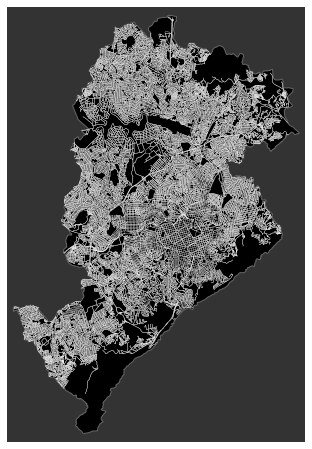

In [40]:
from descartes import PolygonPatch
from shapely.geometry import MultiPolygon
from shapely.geometry import Polygon
# plot the network, but do not show it or close it yet
fig, ax = ox.plot_graph(
    G,
    show=False,
    close=False,
    bgcolor="#333333",
    edge_color="w",
    edge_linewidth=0.3,
    node_size=0,
)

# to this matplotlib axis, add the place shape as descartes polygon patches
for geometry in gdf["geometry"].tolist():
    if isinstance(geometry, (Polygon, MultiPolygon)):
        if isinstance(geometry, Polygon):
            geometry = MultiPolygon([geometry])
        for polygon in geometry.geoms:
            patch = PolygonPatch(polygon, fc="k", ec="#666666", lw=1, alpha=1, zorder=-1)
            ax.add_patch(patch)

# optionally set up the axes extents
margin = 0.02
west, south, east, north = gdf.unary_union.bounds
margin_ns = (north - south) * margin
margin_ew = (east - west) * margin
ax.set_ylim((south - margin_ns, north + margin_ns))
ax.set_xlim((west - margin_ew, east + margin_ew))
plt.show()

In [52]:
G.nodes.data()

NodeDataView({27461710: {'y': -19.8783791, 'x': -43.9298966, 'street_count': 3}, 27558584: {'y': -19.8699862, 'x': -43.937858, 'street_count': 3}, 27558589: {'y': -19.8744352, 'x': -43.9375139, 'street_count': 4}, 27558595: {'y': -19.8719231, 'x': -43.9478877, 'street_count': 3}, 27558622: {'y': -19.8751906, 'x': -43.9358658, 'street_count': 3}, 27558632: {'y': -19.8764738, 'x': -43.9315827, 'street_count': 4}, 27563807: {'y': -19.9220676, 'x': -43.9456254, 'highway': 'traffic_signals', 'street_count': 3}, 27563808: {'y': -19.9234005, 'x': -43.9446394, 'street_count': 3}, 27563811: {'y': -19.9329768, 'x': -43.9356023, 'highway': 'traffic_signals', 'street_count': 4}, 27563812: {'y': -19.9148372, 'x': -43.934758, 'highway': 'traffic_signals', 'street_count': 3}, 27563813: {'y': -19.9394077, 'x': -43.9414608, 'street_count': 4}, 27563817: {'y': -19.9341802, 'x': -43.9380886, 'street_count': 3}, 27563823: {'y': -19.861016, 'x': -43.97145, 'street_count': 3}, 27563825: {'y': -19.8641284, '